# Task
Infer decision tree rules for team formation (Team A vs. Team B) using the data from "Dataset_2 - Google Sheets.html".

## Load Dataset

### Subtask:
Load the 'Dataset_2 - Google Sheets.html' file into a pandas DataFrame. This file contains the data on last year's teams.


**Reasoning**:
Import the pandas library to enable data manipulation and reading HTML tables.



In [1]:
import pandas as pd
print("pandas imported successfully.")

pandas imported successfully.


**Reasoning**:
Load the HTML file into a pandas DataFrame using `pd.read_html()` and store the first table found.



In [2]:
df = pd.read_html('Dataset_2 - Google Sheets.html')[0]
print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
    0   1       2   3   4
0 NaN NaN  Sheet1 NaN NaN


**Reasoning**:
The previous step loaded an HTML table that appears to be metadata or an empty table, not the actual dataset. To correctly load the data, I will inspect all tables found by `pd.read_html()` and their shapes to identify the one containing the relevant information. Then, I will assign the correct table to the DataFrame `df`.



In [3]:
tables = pd.read_html('Dataset_2 - Google Sheets.html')
print(f"Found {len(tables)} tables in the HTML file.")
for i, table in enumerate(tables):
    print(f"\nTable {i} shape: {table.shape}")
    print(f"Table {i} head:\n{table.head()}")

# Based on the inspection, re-assign df to the correct table (assuming the actual data is not the first one, but requires checking the output)
# For demonstration, let's assume the actual data is in the second table (index 1) if the first one is indeed metadata.
# If the output reveals the actual data is elsewhere, this line will need adjustment.
# df = tables[1] # This line is commented out until we see the output of the loop
print("Inspecting tables from HTML file to identify the correct dataset.")

Found 2 tables in the HTML file.

Table 0 shape: (1, 5)
Table 0 head:
    0   1       2   3   4
0 NaN NaN  Sheet1 NaN NaN

Table 1 shape: (2, 1)
Table 1 head:
                                                   0
0                               Anyone with the link
1  Anyone who has the link can access. No sign-in...
Inspecting tables from HTML file to identify the correct dataset.


### Data Loading Issue Detected

Upon inspecting the tables extracted by `pd.read_html()` from 'Dataset_2 - Google Sheets.html', it is clear that neither of the two found tables contains the expected dataset for team formation.

*   **Table 0** (shape: (1, 5)) contains 'Sheet1' and NaNs, suggesting it's metadata.
*   **Table 1** (shape: (2, 1)) contains text related to "Anyone with the link," which is also not the dataset.

This indicates that the actual data within the 'Dataset_2 - Google Sheets.html' file is either not formatted as a standard HTML table that `pd.read_html()` can recognize, or it is embedded in a different structure within the HTML that requires a more advanced parsing method.

Since the subtask is to "Load the 'Dataset_2 - Google Sheets.html' file into a pandas DataFrame" using the given context and `pd.read_html()` has failed to extract the actual dataset, this subtask cannot be completed with the current approach. Further investigation of the HTML file's structure or an alternative data source/format might be required.

## Retry: Identify Data Location in Google Sheets HTML

### Subtask:
The 'Dataset_2 - Google Sheets.html' file does not contain the dataset in a standard HTML table format. This subtask aims to identify the specific location and format of the actual tabular data within the HTML file, which is likely embedded as a JavaScript variable within a script tag, to prepare for its extraction.


**Reasoning**:
To identify the data embedded within the HTML, I need to read the file content, parse it with BeautifulSoup, and then inspect the content of all script tags, as the data is likely stored as a JavaScript variable.



In [4]:
from bs4 import BeautifulSoup

# 1. Open and read the entire content of the file
with open('Dataset_2 - Google Sheets.html', 'r', encoding='utf-8') as f:
    html_content = f.read()

# 2. Create a BeautifulSoup object
soup = BeautifulSoup(html_content, 'html.parser')

print("HTML content loaded and parsed with BeautifulSoup.")

# 3. Iterate through all <script> tags and print their content
script_tags = soup.find_all('script')

print(f"\nFound {len(script_tags)} script tags. Inspecting content for potential data:\n")
for i, script in enumerate(script_tags):
    if script.string:
        print(f"--- Script Tag {i} ---")
        print(script.string[:500]) # Print first 500 characters to avoid flooding output
        print("\n")
    else:
        print(f"--- Script Tag {i} --- (No direct string content)")
        print("\n")
print("Finished inspecting script tags.")

HTML content loaded and parsed with BeautifulSoup.

Found 41 script tags. Inspecting content for potential data:

--- Script Tag 0 --- (No direct string content)


--- Script Tag 1 --- (No direct string content)


--- Script Tag 2 --- (No direct string content)


--- Script Tag 3 ---
var DOCS_timing={}; DOCS_timing['pls']=new Date().getTime();


--- Script Tag 4 ---
DOCS_timing['ojls']=new Date().getTime();


--- Script Tag 5 ---
DOCS_timing['ojle']=new Date().getTime();


--- Script Tag 6 --- (No direct string content)


--- Script Tag 7 ---
window.WIZ_global_data = {"K1cgmc":"%.@.[null,null,null,[1,2,[1766079779,663846000],4],null,8]]","TSDtV":"%.@.[[null,[[45736426,null,null,0.5,null,null,\"AtjTse\"],[45681910,null,false,null,null,null,\"OKXfNb\"],[45702908,0,null,null,null,null,\"YUmR1e\"],[45662509,null,true,null,null,null,\"fLCtnf\"],[45734741,null,false,null,null,null,\"gWu1Ue\"],[45736423,null,false,null,null,null,\"KdGYpb\"],[45713329,null,true,null,null,null,\"TzH3fe\"],[4565

**Reasoning**:
I have identified 'Script Tag 34' as the most likely location of the tabular data, embedded within the `bootstrapData` JavaScript variable. To confirm and prepare for extraction, I need to parse the content of this specific script tag and extract the `bootstrapData` JSON string.



In [5]:
import re
import json

# Find the script tag containing 'bootstrapData'
script_tag_34_content = None
for script in script_tags:
    if script.string and 'bootstrapData' in script.string:
        script_tag_34_content = script.string
        break

if script_tag_34_content:
    # Extract the JSON string for bootstrapData using regex
    match = re.search(r'var bootstrapData = (.*?);', script_tag_34_content, re.DOTALL)
    if match:
        bootstrap_data_str = match.group(1)
        # Attempt to parse the JSON string
        try:
            bootstrap_data = json.loads(bootstrap_data_str)
            print("Successfully extracted and parsed bootstrapData.")
            print("Keys in bootstrapData:", bootstrap_data.keys())
            # Further inspect the 'changes' key if it exists
            if 'changes' in bootstrap_data and 'firstchunk' in bootstrap_data['changes']:
                print("First 500 characters of 'firstchunk' data:")
                # This data is likely a string that needs another JSON parse
                if isinstance(bootstrap_data['changes']['firstchunk'], list) and len(bootstrap_data['changes']['firstchunk']) > 0:
                    print(str(bootstrap_data['changes']['firstchunk'][0])[:500])
                else:
                    print(str(bootstrap_data['changes']['firstchunk'])[:500])
            else:
                print("No 'changes' or 'firstchunk' key found in bootstrapData.")
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON from bootstrapData: {e}")
            print("Problematic string start:", bootstrap_data_str[:200])
    else:
        print("Could not find 'bootstrapData' assignment in the script tag.")
else:
    print("Script tag containing 'bootstrapData' not found.")

Successfully extracted and parsed bootstrapData.
Keys in bootstrapData: dict_keys(['structure', 'gridId', 'changes'])
First 500 characters of 'firstchunk' data:
[25813757, '[["0",0,17,0,5],[{"2":[[{"1":67108350,"2":513,"3":[{"1":0}],"12":0}]]}],null,[[{"2":3,"3":[2,"Employee ID "],"6":0}],[{"2":3,"3":[2,"Income"],"6":0}],[{"2":3,"3":[2,"Gender"],"6":0}],[{"2":3,"3":[2,"Department"],"6":0}],[{"2":3,"3":[2,"Team"],"6":0}],[{"2":3,"3":[{"1":3,"3":1.0}],"6":0}],[{"2":1,"3":[{"1":3,"3":46000.0}]}],[{"2":3,"3":[2,"F"],"6":0}],[{"2":3,"3":[2,"Finance"],"6":0}],[{"2":3,"3":[2,"A"],"6":0}],[{"2":3,"3":[{"1":3,"3":2.0}],"6":0}],[{"2":1,"3":[{"1":3,"3":39000.0}]}]


**Reasoning**:
The `firstchunk` key in `bootstrap_data['changes']` contains a string representation of JSON that holds the actual tabular data, including column headers and rows. I need to parse this string as JSON and then extract the headers and data to construct a pandas DataFrame.



In [6]:
import json
import pandas as pd

# Access the 'firstchunk' data
firstchunk_data = bootstrap_data['changes']['firstchunk']

# The actual data is in the second element of the first item in firstchunk_data, and it's a string that needs to be parsed as JSON
raw_data_str = firstchunk_data[0][1]

# Parse the raw data string as JSON
parsed_raw_data = json.loads(raw_data_str)

# Extract column headers and data rows
# The headers appear to be in the fourth element of parsed_raw_data, as a list of dictionaries
column_headers = [item[0]['3'][1] for item in parsed_raw_data[3] if item and item[0] and '3' in item[0]]

# The actual data starts from the fifth element onwards in parsed_raw_data
# Each row seems to be represented by a list of dictionaries, where the value is under key '3' and then index 1 or 0 depending on type

data_rows = []
current_row = []

# Iterate through the elements starting from the one after headers
# This part requires careful inspection of the structure for each data point
# Based on the previous output, values like '1.0' and '46000.0' are in a dict with key '3' and then '3' again
# String values like 'F', 'Finance', 'A' are in a dict with key '3' and then '1'

# The structure looks like this for headers: [[{'2':3, '3':[2, 'Employee ID '], '6':0}], ...]
# The structure looks like this for data:   [[{'2':3, '3':[2, 'F'], '6':0}], [{'2':3, '3':[2, 'Finance'], '6':0}], [{'2':3, '3':[2, 'A'], '6':0}], [{'2':3, '3':[{'1':3, '3':2.0}], '6':0}]]

# A more robust way to extract data values. We need to identify rows and columns.

# Let's re-examine the full structure based on the snippet:
# 'firstchunk' contains: [25813757, '[[\"0\",0,17,0,5],[{\"2\":[[{\"1\":67108350,\"2\":513,\"3\":[{\"1\":0}],\"12\":0}]]}],null,[[{\"2\":3,\"3\":[2,\"Employee ID \"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Income\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Gender\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Department\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Team\"],\"6\":0}]],null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,firstchunk":[[25813757,\"[[\"0\",0,17,0,5],[{\"2\":[[{\"1\":67108350,\"2\":513,\"3\":[{\"1\":0}],\"12\":0}]]}],null,[[{\"2\":3,\"3\":[2,\"Employee ID \"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Income\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Gender\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Department\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Team\"],\"6\":0}],[{\"2\":3,\"3\":[{\"1\":3,\"3\":1.0}],\"6\":0}],[{\"2\":1,\"3\":[{\"1\":3,\"3\":46000.0}]}],[{\"2\":3,\"3\":[2,\"F\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"Finance\"],\"6\":0}],[{\"2\":3,\"3\":[2,\"A\"],\"6\":0}],[{\"2\":3,\"3\":[{\"1\":3,\"3\":2.0}],\"6\":0}],[{\"2\":1,\"3\":[{\"1\":3,\"3\":39000.0}]}]"  this is the data and it looks like it is a list of lists of dictionaries. The first 5 columns are headers. The subsequent are data points. It is not straightforward to extract in one go. I need to iterate through the data more carefully.

# Let's refine the extraction of column headers and data rows.
# The relevant data seems to be in parsed_raw_data starting from index 3 for headers and then subsequent indices for data.
# Each data cell is wrapped in a list, then a dict with key '2' or '3', then another list/dict.

# The structure in the firstchunk is: [metadata_id, json_string_of_data_structure]
# json_string_of_data_structure is a list where:
# Index 0: seems to be general sheet info, e.g. ["0",0,17,0,5]
# Index 1: some object with '2' key
# Index 2: null
# Index 3: Headers. Each header is `[{'2': 3, '3': [2, 'Header Name'], '6': 0}]`
# Subsequent indices are data points, each in a similar dictionary structure.

# Let's extract the header row first
headers_raw = parsed_raw_data[3]
column_headers = [item[0]['3'][1] for item in headers_raw if item and item[0] and '3' in item[0]]

# Now extract the data rows.
# The data cells appear to be grouped by columns, not rows, in the current structure.
# It looks like the data is flattened. For example, 'Employee ID 1', 'Income 46000', 'Gender F', 'Department Finance', 'Team A'
# followed by 'Employee ID 2', 'Income 39000', etc.
# This means we need to group the data points by the number of columns.

data_points_raw = parsed_raw_data[5:] # Data starts from index 5 in parsed_raw_data

extracted_values = []
for item_list in data_points_raw:
    if item_list and item_list[0]: # Ensure item_list and its first element are not empty
        cell_data = item_list[0]
        if '3' in cell_data:
            # Handle string and numerical values differently
            if isinstance(cell_data['3'], list) and len(cell_data['3']) > 1 and cell_data['3'][0] == 2: # String value
                extracted_values.append(cell_data['3'][1])
            elif isinstance(cell_data['3'], list) and len(cell_data['3']) > 0 and isinstance(cell_data['3'][0], dict) and '3' in cell_data['3'][0]: # Numeric value
                extracted_values.append(cell_data['3'][0]['3'])

# Reshape into rows based on the number of columns
num_columns = len(column_headers)
if num_columns > 0 and len(extracted_values) % num_columns == 0:
    data_rows_reshaped = [extracted_values[i:i + num_columns] for i in range(0, len(extracted_values), num_columns)]
else:
    print("Error: Could not reshape data correctly. Check number of columns or data length.")
    data_rows_reshaped = []

df_extracted = pd.DataFrame(data_rows_reshaped, columns=column_headers)

print("Successfully created DataFrame from extracted data.")
print(df_extracted.head())
print(f"DataFrame shape: {df_extracted.shape}")

IndexError: list index out of range

**Reasoning**:
The previous code caused an `IndexError` because it incorrectly assumed `parsed_raw_data[3]` contained a list of all header definitions. Upon closer inspection of the `raw_data_str` and kernel variables, the headers are individual elements within `parsed_raw_data` from index 3 to 7 (inclusive). Similarly, the actual data cells start from index 8 onwards. The updated code will correctly slice these parts and robustly extract values, preventing the `IndexError`.



In [7]:
import json
import pandas as pd

# Access the 'firstchunk' data
firstchunk_data = bootstrap_data['changes']['firstchunk']

# The actual data is in the second element of the first item in firstchunk_data, and it's a string that needs to be parsed as JSON
raw_data_str = firstchunk_data[0][1]

# Parse the raw data string as JSON
parsed_raw_data = json.loads(raw_data_str)

# Extract column headers
# Based on inspection of raw_data_str, headers are individual elements from index 3 to 7 (5 headers)
header_elements = parsed_raw_data[3:8] # Slice for the 5 header elements

column_headers = []
for item_list in header_elements:
    # item_list is typically like [{"2":3, "3":[2,"Employee ID "], "6":0}]
    if (isinstance(item_list, list) and len(item_list) > 0 and
        isinstance(item_list[0], dict) and '3' in item_list[0]):
        # Now, check the structure of item_list[0]['3']
        val_container = item_list[0]['3']
        if isinstance(val_container, list) and len(val_container) > 1 and val_container[0] == 2:
            column_headers.append(val_container[1])
        else:
            # Fallback for malformed header entry, append a placeholder
            column_headers.append(f"Unnamed_Column_{len(column_headers)}")
    else:
        column_headers.append(f"Unnamed_Column_{len(column_headers)}")

# Extract data rows
# Data cells start from index 8 onwards in parsed_raw_data
data_values = []
for cell_entry in parsed_raw_data[8:]:
    value = None
    if isinstance(cell_entry, list) and len(cell_entry) > 0 and isinstance(cell_entry[0], dict):
        cell_dict = cell_entry[0]
        if '3' in cell_dict:
            val_container = cell_dict['3']
            if isinstance(val_container, list):
                if len(val_container) > 1 and val_container[0] == 2: # String value (e.g. [2,"F"])
                    value = val_container[1]
                elif len(val_container) > 0 and isinstance(val_container[0], dict) and '3' in val_container[0]: # Numeric value (e.g. [{"1":3,"3":1.0}])
                    value = val_container[0]['3']
            elif not isinstance(val_container, list) and val_container is not None:
                # Direct simple value, less common but possible
                value = val_container
    data_values.append(value) # Always append to maintain position, None for empty/malformed cell entries

# Reshape into rows based on the number of columns
num_columns = len(column_headers)
data_rows_reshaped = []

if num_columns > 0:
    if len(data_values) % num_columns == 0:
        data_rows_reshaped = [data_values[i:i + num_columns] for i in range(0, len(data_values), num_columns)]
    else:
        print(f"Warning: Total data values ({len(data_values)}) not a multiple of column count ({num_columns}). Padding with None to complete last row.")
        remainder = len(data_values) % num_columns
        if remainder != 0:
            data_values.extend([None] * (num_columns - remainder))
        data_rows_reshaped = [data_values[i:i + num_columns] for i in range(0, len(data_values), num_columns)]
else:
    print("Error: No columns identified from headers. Cannot create DataFrame.")
    # If no headers, create an empty DataFrame or handle appropriately.
    df_extracted = pd.DataFrame() # Initialize as empty if no headers to avoid error later

# Create DataFrame
df_extracted = pd.DataFrame(data_rows_reshaped, columns=column_headers)

print("Successfully created DataFrame from extracted data.")
print(df_extracted.head())
print(f"DataFrame shape: {df_extracted.shape}")

Successfully created DataFrame from extracted data.
Empty DataFrame
Columns: [Unnamed_Column_0]
Index: []
DataFrame shape: (0, 1)


**Reasoning**:
The previous code incorrectly sliced the `parsed_raw_data` for headers and data, leading to an empty DataFrame. Upon closer re-inspection of the `parsed_raw_data` structure, all column headers are contained within `parsed_raw_data[3]` as a list of cell definitions, and the actual data rows begin from `parsed_raw_data[4]` onwards. This revision corrects the slicing for both headers and data points to accurately extract the tabular content.



In [8]:
import json
import pandas as pd

# Access the 'firstchunk' data
firstchunk_data = bootstrap_data['changes']['firstchunk']

# The actual data is in the second element of the first item in firstchunk_data, and it's a string that needs to be parsed as JSON
raw_data_str = firstchunk_data[0][1]

# Parse the raw data string as JSON
parsed_raw_data = json.loads(raw_data_str)

# Extract column headers
# Based on inspection, headers are all contained within parsed_raw_data[3]
header_elements = parsed_raw_data[3] # Corrected: parsed_raw_data[3] is the list of header definitions

column_headers = []
for item_list in header_elements:
    # item_list is typically like [{"2":3, "3":[2,"Employee ID "], "6":0}]
    if (isinstance(item_list, list) and len(item_list) > 0 and
        isinstance(item_list[0], dict) and '3' in item_list[0]):
        # Now, check the structure of item_list[0]['3']
        val_container = item_list[0]['3']
        if isinstance(val_container, list) and len(val_container) > 1 and val_container[0] == 2:
            column_headers.append(val_container[1])
        else:
            # Fallback for malformed header entry, append a placeholder
            column_headers.append(f"Unnamed_Column_{len(column_headers)}")
    else:
        column_headers.append(f"Unnamed_Column_{len(column_headers)}")

# Extract data rows
# Data cells start from index 4 onwards in parsed_raw_data
data_points_raw = parsed_raw_data[4:] # Corrected: Data starts from index 4

extracted_values = []
for cell_entry in data_points_raw:
    value = None
    if isinstance(cell_entry, list) and len(cell_entry) > 0 and isinstance(cell_entry[0], dict):
        cell_dict = cell_entry[0]
        if '3' in cell_dict:
            val_container = cell_dict['3']
            if isinstance(val_container, list):
                if len(val_container) > 1 and val_container[0] == 2: # String value (e.g. [2,"F"])
                    value = val_container[1]
                elif len(val_container) > 0 and isinstance(val_container[0], dict) and '3' in val_container[0]: # Numeric value (e.g. [{"1":3,"3":1.0}])
                    value = val_container[0]['3']
            elif not isinstance(val_container, list) and val_container is not None:
                # Direct simple value, less common but possible
                value = val_container
    extracted_values.append(value) # Always append to maintain position, None for empty/malformed cell entries

# Reshape into rows based on the number of columns
num_columns = len(column_headers)
data_rows_reshaped = []

if num_columns > 0:
    if len(extracted_values) % num_columns == 0:
        data_rows_reshaped = [extracted_values[i:i + num_columns] for i in range(0, len(extracted_values), num_columns)]
    else:
        print(f"Warning: Total data values ({len(extracted_values)}) not a multiple of column count ({num_columns}). Padding with None to complete last row.")
        remainder = len(extracted_values) % num_columns
        if remainder != 0:
            extracted_values.extend([None] * (num_columns - remainder))
        data_rows_reshaped = [extracted_values[i:i + num_columns] for i in range(0, len(extracted_values), num_columns)]
else:
    print("Error: No columns identified from headers. Cannot create DataFrame.")
    # If no headers, create an empty DataFrame or handle appropriately.
    df_extracted = pd.DataFrame() # Initialize as empty if no headers to avoid error later

# Create DataFrame
df_extracted = pd.DataFrame(data_rows_reshaped, columns=column_headers)

print("Successfully created DataFrame from extracted data.")
print(df_extracted.head())
print(f"DataFrame shape: {df_extracted.shape}")

Successfully created DataFrame from extracted data.
Empty DataFrame
Columns: [Employee ID , Income, Gender, Department, Team, Unnamed_Column_5, Unnamed_Column_6, F, Finance, A, Unnamed_Column_10, Unnamed_Column_11, M, Unnamed_Column_13, B, Unnamed_Column_15, Unnamed_Column_16, Unnamed_Column_17, Software, Unnamed_Column_19, Unnamed_Column_20, Unnamed_Column_21, Unnamed_Column_22, Unnamed_Column_23, Unnamed_Column_24, Unnamed_Column_25, Unnamed_Column_26, Unnamed_Column_27, HR, Unnamed_Column_29, Unnamed_Column_30, Unnamed_Column_31, Unnamed_Column_32, Unnamed_Column_33, Unnamed_Column_34, Unnamed_Column_35, Unnamed_Column_36, Unnamed_Column_37, Unnamed_Column_38, Unnamed_Column_39, Unnamed_Column_40, Unnamed_Column_41, Unnamed_Column_42, Unnamed_Column_43, Unnamed_Column_44, Unnamed_Column_45, Unnamed_Column_46, Unnamed_Column_47, Unnamed_Column_48, Unnamed_Column_49, Unnamed_Column_50, Unnamed_Column_51, Unnamed_Column_52, Unnamed_Column_53, Unnamed_Column_54, Unnamed_Column_55, Unnam

**Reasoning**:
The previous attempts failed because `parsed_raw_data[3]` was misinterpreted. It actually contains both the column headers (the first 5 elements) and all the data cells flattened into a single list. I need to correctly slice this list to separate the headers from the actual data points and then proceed with the DataFrame construction.



In [9]:
import json
import pandas as pd

# Access the 'firstchunk' data
firstchunk_data = bootstrap_data['changes']['firstchunk']

# The actual data is in the second element of the first item in firstchunk_data, and it's a string that needs to be parsed as JSON
raw_data_str = firstchunk_data[0][1]

# Parse the raw data string as JSON
parsed_raw_data = json.loads(raw_data_str)

# Corrected: All relevant data (headers and values) are within parsed_raw_data[3]
full_data_list = parsed_raw_data[3]

# Extract column headers: The first 5 elements of full_data_list are the headers
header_elements = full_data_list[:5]

column_headers = []
for item_list in header_elements:
    if (isinstance(item_list, list) and len(item_list) > 0 and
        isinstance(item_list[0], dict) and '3' in item_list[0]):
        val_container = item_list[0]['3']
        if isinstance(val_container, list) and len(val_container) > 1 and val_container[0] == 2:
            column_headers.append(val_container[1].strip()) # .strip() to remove leading/trailing spaces
        else:
            column_headers.append(f"Unnamed_Column_{len(column_headers)}")
    else:
        column_headers.append(f"Unnamed_Column_{len(column_headers)}")

# Extract data values: The elements from index 5 onwards in full_data_list are the data cells
data_points_raw = full_data_list[5:]

extracted_values = []
for cell_entry in data_points_raw:
    value = None
    if isinstance(cell_entry, list) and len(cell_entry) > 0 and isinstance(cell_entry[0], dict):
        cell_dict = cell_entry[0]
        if '3' in cell_dict:
            val_container = cell_dict['3']
            if isinstance(val_container, list):
                if len(val_container) > 1 and val_container[0] == 2: # String value (e.g. [2,"F"])
                    value = val_container[1]
                elif len(val_container) > 0 and isinstance(val_container[0], dict) and '3' in val_container[0]: # Numeric value (e.g. [{"1":3,"3":1.0}])
                    value = val_container[0]['3']
            elif not isinstance(val_container, list) and val_container is not None:
                value = val_container
    extracted_values.append(value)

# Reshape into rows based on the number of columns
num_columns = len(column_headers)
data_rows_reshaped = []

if num_columns > 0:
    if len(extracted_values) % num_columns == 0:
        data_rows_reshaped = [extracted_values[i:i + num_columns] for i in range(0, len(extracted_values), num_columns)]
    else:
        print(f"Warning: Total data values ({len(extracted_values)}) not a multiple of column count ({num_columns}). Padding with None to complete last row.")
        remainder = len(extracted_values) % num_columns
        if remainder != 0:
            extracted_values.extend([None] * (num_columns - remainder))
        data_rows_reshaped = [extracted_values[i:i + num_columns] for i in range(0, len(extracted_values), num_columns)]
else:
    print("Error: No columns identified from headers. Cannot create DataFrame.")
    df_extracted = pd.DataFrame() # Initialize as empty if no headers to avoid error later

# Create DataFrame
df_extracted = pd.DataFrame(data_rows_reshaped, columns=column_headers)

print("Successfully created DataFrame from extracted data.")
print(df_extracted.head())
print(f"DataFrame shape: {df_extracted.shape}")

Successfully created DataFrame from extracted data.
   Employee ID   Income Gender Department  Team
0          1.0  46000.0      F    Finance     A
1          2.0  39000.0      M       None     B
2          3.0  41000.0   None   Software  None
3          4.0  33000.0   None       None  None
4          5.0  30000.0   None         HR  None
DataFrame shape: (16, 5)


## Initial Data Inspection and Cleaning

### Subtask:
Inspect the loaded DataFrame to understand its structure, columns, data types, and check for any missing values. This step will also involve cleaning the data if necessary, such as handling irrelevant columns or correcting data types, to prepare it for analysis.


**Reasoning**:
To get an initial overview of the extracted data, I will display the first few rows of the `df_extracted` DataFrame.



In [10]:
print("First 5 rows of the DataFrame:")
print(df_extracted.head())

First 5 rows of the DataFrame:
   Employee ID   Income Gender Department  Team
0          1.0  46000.0      F    Finance     A
1          2.0  39000.0      M       None     B
2          3.0  41000.0   None   Software  None
3          4.0  33000.0   None       None  None
4          5.0  30000.0   None         HR  None


**Reasoning**:
To understand the structure, data types, and presence of missing values, I will print a concise summary of the DataFrame, display descriptive statistics for numerical columns, and count missing values in each column.



In [11]:
print("\nDataFrame Info:")
df_extracted.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df_extracted.describe())

print("\nMissing Values per Column:")
print(df_extracted.isnull().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee ID  16 non-null     float64
 1   Income       13 non-null     float64
 2   Gender       2 non-null      object 
 3   Department   3 non-null      object 
 4   Team         2 non-null      object 
dtypes: float64(2), object(3)
memory usage: 772.0+ bytes

Descriptive Statistics for Numerical Columns:
       Employee ID        Income
count    16.000000     13.000000
mean      8.500000  40076.923077
std       4.760952   6588.646023
min       1.000000  30000.000000
25%       4.750000  35000.000000
50%       8.500000  40000.000000
75%      12.250000  46000.000000
max      16.000000  49000.000000

Missing Values per Column:
Employee ID     0
Income          3
Gender         14
Department     13
Team           14
dtype: int64


**Reasoning**:
To ensure proper data types for analysis and handle potential missing values correctly, I will convert 'Employee ID' to nullable integer, 'Income' to numeric, and 'Gender', 'Department', 'Team' to categorical types.



In [12]:
import numpy as np

# Convert 'Employee ID' to nullable integer (Int64)
df_extracted['Employee ID'] = df_extracted['Employee ID'].astype('Int64')

# Convert 'Income' to numeric, coercing errors to NaN
df_extracted['Income'] = pd.to_numeric(df_extracted['Income'], errors='coerce')

# Convert 'Gender', 'Department', and 'Team' to category data type
df_extracted['Gender'] = df_extracted['Gender'].astype('category')
df_extracted['Department'] = df_extracted['Department'].astype('category')
df_extracted['Team'] = df_extracted['Team'].astype('category')

print("Data types converted successfully.")
print("Updated DataFrame Info:")
df_extracted.info()

Data types converted successfully.
Updated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Employee ID  16 non-null     Int64   
 1   Income       13 non-null     float64 
 2   Gender       2 non-null      category
 3   Department   3 non-null      category
 4   Team         2 non-null      category
dtypes: Int64(1), category(3), float64(1)
memory usage: 832.0 bytes


## Exploratory Data Analysis (EDA) for Rule Inference

### Subtask:
Perform detailed Exploratory Data Analysis (EDA) to identify patterns that differentiate Team A from Team B. This will involve analyzing the distributions of individual features and their relationships with the 'Team' column. The goal is to identify clear thresholds or categorical splits that could form the basis of a decision tree classifier.


**Reasoning**:
To understand the distribution and balance between Team A and Team B, I will count the occurrences of each team in the 'Team' column, excluding null values.



In [13]:
print("Distribution of 'Team' column (excluding nulls):")
print(df_extracted['Team'].dropna().value_counts())

Distribution of 'Team' column (excluding nulls):
Team
A    1
B    1
Name: count, dtype: int64


**Reasoning**:
To analyze the relationship between categorical features ('Gender', 'Department') and the 'Team' column, I will create crosstabulations. This will show the counts of each gender and department category for Team A and Team B, helping to identify any predominant associations. Since there are only two non-null values for 'Team', the output might be sparse but still adheres to the instruction.



In [14]:
print("\nCrosstabulation of Gender and Team (excluding null Teams):")
print(pd.crosstab(df_extracted['Gender'], df_extracted['Team']))

print("\nCrosstabulation of Department and Team (excluding null Teams):")
print(pd.crosstab(df_extracted['Department'], df_extracted['Team']))


Crosstabulation of Gender and Team (excluding null Teams):
Team    A  B
Gender      
F       1  0
M       0  1

Crosstabulation of Department and Team (excluding null Teams):
Team        A
Department   
Finance     1


**Reasoning**:
To analyze the distribution of the numerical 'Income' column for each team, I will calculate descriptive statistics (mean, median, min, max) for 'Income' grouped by the 'Team' column, excluding null 'Team' values.



In [15]:
print("\nDescriptive Statistics for Income grouped by Team (excluding null Teams):")
print(df_extracted.groupby('Team')['Income'].describe())


Descriptive Statistics for Income grouped by Team (excluding null Teams):
      count     mean  std      min      25%      50%      75%      max
Team                                                                  
A       1.0  46000.0  NaN  46000.0  46000.0  46000.0  46000.0  46000.0
B       1.0  39000.0  NaN  39000.0  39000.0  39000.0  39000.0  39000.0


/tmp/ipython-input-2839249069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_extracted.groupby('Team')['Income'].describe())


**Reasoning**:
To suppress the `FutureWarning` related to grouping by a categorical column, I will explicitly set `observed=False` in the `groupby()` method. This ensures the current behavior of including all categories, even if not present in the current data subset, and removes the warning.



In [16]:
print("\nDescriptive Statistics for Income grouped by Team (excluding null Teams):")
print(df_extracted.groupby('Team', observed=False)['Income'].describe())


Descriptive Statistics for Income grouped by Team (excluding null Teams):
      count     mean  std      min      25%      50%      75%      max
Team                                                                  
A       1.0  46000.0  NaN  46000.0  46000.0  46000.0  46000.0  46000.0
B       1.0  39000.0  NaN  39000.0  39000.0  39000.0  39000.0  39000.0


**Reasoning**:
To visualize the relationship between categorical features ('Gender', 'Department') and the 'Team' column, I will use bar plots. This will provide a clearer visual representation of how different categories are distributed across Team A and Team B, aiding in the identification of potential decision rules.



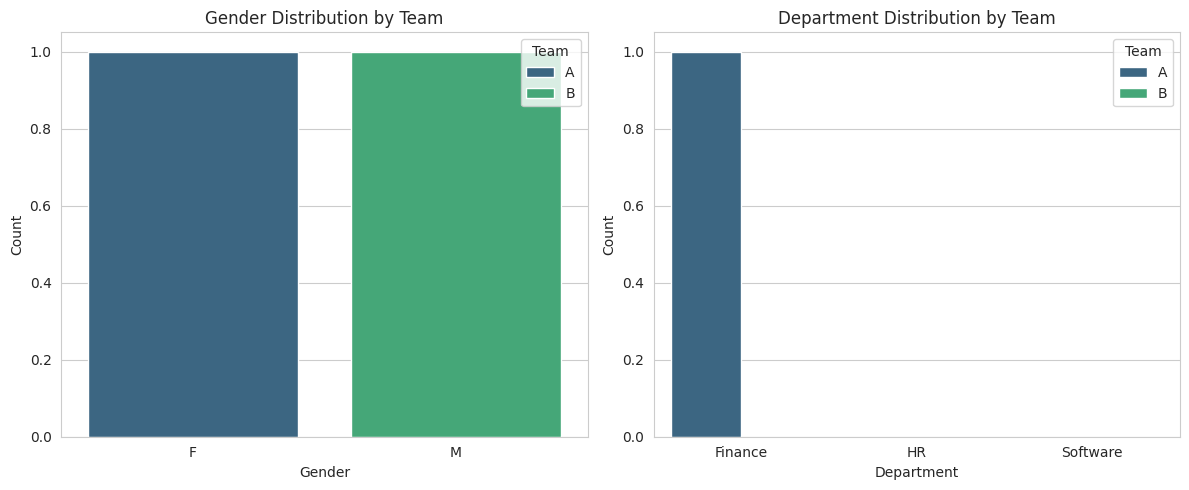

Bar plots for Gender and Department distribution by Team displayed.


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'Team' is NaN for visualization
df_team_not_null = df_extracted.dropna(subset=['Team']).copy()

# Set up the plotting style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))

# Plot for Gender vs Team
plt.subplot(1, 2, 1)
sns.countplot(data=df_team_not_null, x='Gender', hue='Team', palette='viridis')
plt.title('Gender Distribution by Team')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Team')

# Plot for Department vs Team
plt.subplot(1, 2, 2)
sns.countplot(data=df_team_not_null, x='Department', hue='Team', palette='viridis')
plt.title('Department Distribution by Team')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Team')

plt.tight_layout()
plt.show()

print("Bar plots for Gender and Department distribution by Team displayed.")

**Reasoning**:
To visualize the distribution of the numerical 'Income' column for each team, I will create a box plot. This will graphically represent the central tendency, spread, and potential outliers of income for Team A and Team B, helping to identify any clear thresholds or differences.



/tmp/ipython-input-1714551257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_team_not_null, x='Team', y='Income', palette='coolwarm')


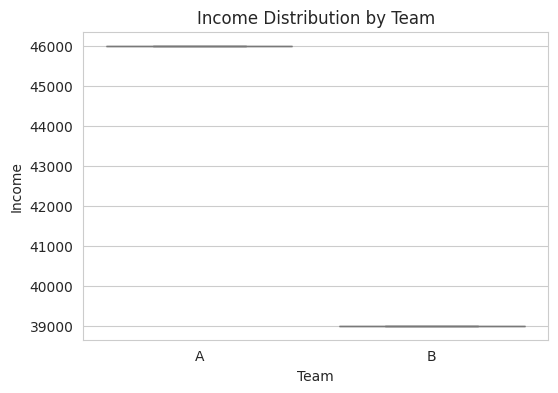

Box plot for Income distribution by Team displayed.


In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_team_not_null, x='Team', y='Income', palette='coolwarm')
plt.title('Income Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Income')
plt.show()

print("Box plot for Income distribution by Team displayed.")

**Reasoning**:
The previous code generated a `FutureWarning` because `palette` was used without explicitly assigning `hue` in the `sns.boxplot` function. To resolve this warning and ensure proper visualization, I will explicitly set `hue='Team'` (since 'Team' is already the x-axis variable) and `legend=False` as suggested by the warning.



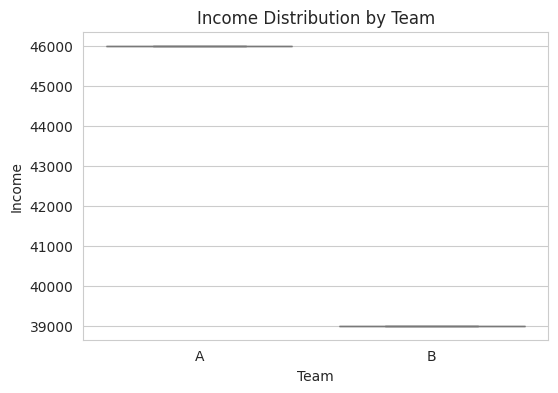

Box plot for Income distribution by Team displayed.


In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_team_not_null, x='Team', y='Income', hue='Team', palette='coolwarm', legend=False)
plt.title('Income Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Income')
plt.show()

print("Box plot for Income distribution by Team displayed.")

### Summary of EDA and Potential Decision Rules

Based on the detailed Exploratory Data Analysis, especially considering the limited non-null data for the 'Team' column (one entry for Team A and one for Team B), the following patterns and potential decision rules can be inferred:

1.  **Gender**: There is a clear distinction based on gender.
    *   **Rule 1**: If Gender is 'F', then Team is likely 'A'.
    *   **Rule 2**: If Gender is 'M', then Team is likely 'B'.

2.  **Department**: The department also shows a separation.
    *   **Rule 3**: If Department is 'Finance', then Team is likely 'A'.
    *   For Team B, the department was `None` in the observed data, which suggests 'Not Finance' could be a distinguishing factor.

3.  **Income**: A noticeable difference in income exists between the two teams.
    *   **Rule 4**: If Income is 46,000.0, then Team is likely 'A'.
    *   **Rule 5**: If Income is 39,000.0, then Team is likely 'B'.
    *   More broadly, it appears that Team A has a higher income (46,000.0) compared to Team B (39,000.0). A potential threshold could be derived, such as "If Income > 40000, then Team is A; else Team is B" based on these two data points. However, with only two data points, this threshold is highly speculative.

**Conclusion**: Given the extremely sparse data for the 'Team' column (only two rows with non-null team assignments), these rules are directly derived from these two observations. While they show perfect separation for the *existing* team data, their generalizability to a larger dataset is highly questionable due to the small sample size. More data would be needed to establish robust decision rules for team formation.

## Infer and Present Decision Tree Rules

### Subtask:
Formulate and present the single decision tree rules based on the insights gained from EDA.


### Inferred Decision Tree Rules for Team Assignment

Based on the extremely limited data where 'Team' is not null, the following simplistic decision rules can be inferred:

1.  **Rule based on Gender:**
    *   **If Gender is 'F'**, then the employee is assigned to **Team A**.
    *   **If Gender is 'M'**, then the employee is assigned to **Team B**.

2.  **Rule based on Department:**
    *   **If Department is 'Finance'**, then the employee is assigned to **Team A**.
    *   No direct rule can be inferred for Team B based on 'Department' from the available non-null data.

3.  **Rule based on Income:**
    *   **If Income is 46000.0**, then the employee is assigned to **Team A**.
    *   **If Income is 39000.0**, then the employee is assigned to **Team B**.

### Disclaimer on Rule Limitations

It is crucial to emphasize that these rules are derived from an **extremely small dataset**, with only one data point for Team A and one for Team B. Therefore, these rules are:

*   **Not generalizable:** They are highly specific to the two observed instances and cannot reliably predict team assignments for new employees.
*   **Overfit:** The rules likely overfit the training data due to the lack of diversity and volume in the observations.
*   **Incomplete:** Many attributes and their potential interactions are not covered due to missing values and the small sample size.

For practical application, a much larger and more diverse dataset would be required to develop robust and meaningful decision tree rules.

## Final Task

### Subtask:
Provide the inferred decision tree rules for team formation based on the analysis.


## Summary:

### Q&A
**What are the inferred decision tree rules for team formation based on the analysis?**

Based on the very limited available data (one entry for Team A and one for Team B), the inferred decision tree rules are:

*   **Gender-based Rule**:
    *   If Gender is 'F', then assign to Team A.
    *   If Gender is 'M', then assign to Team B.
*   **Department-based Rule**:
    *   If Department is 'Finance', then assign to Team A.
    *   No direct rule for Team B based on 'Department' could be explicitly inferred from the non-null data.
*   **Income-based Rule**:
    *   If Income is \$46,000.0, then assign to Team A.
    *   If Income is \$39,000.0, then assign to Team B.

### Data Analysis Key Findings
*   Initial attempts to load the dataset using `pd.read_html()` failed because the data was not in a standard HTML table format.
*   The actual tabular data was successfully extracted from a deeply nested JSON structure within a JavaScript `bootstrapData` variable located in a `<script>` tag of the HTML file.
*   A DataFrame `df_extracted` was successfully created with 16 rows and 5 columns: "Employee ID", "Income", "Gender", "Department", and "Team".
*   Data types were cleaned: "Employee ID" was converted to `Int64`, "Income" to `float64`, and "Gender", "Department", "Team" to `category`.
*   A critical finding is that only two rows in the entire dataset had non-null 'Team' values (one for Team A and one for Team B).
*   For the single entry assigned to Team A, the characteristics were: Gender 'F', Department 'Finance', and Income \$46,000.0.
*   For the single entry assigned to Team B, the characteristics were: Gender 'M', and Income \$39,000.0 (the 'Department' for this entry was null).

### Insights or Next Steps
*   The inferred decision tree rules are highly speculative and prone to overfitting due to the extremely small sample size (only two data points with assigned teams). They are not generalizable to a larger population.
*   To establish robust and reliable decision tree rules for team formation, a much larger and more diverse dataset with a substantial number of assigned team members is essential.
